<a href="https://colab.research.google.com/github/ricotta-jpgomes/yt_datatools/blob/main/ytSearch_channel_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YouTube Channel Search
<br>

Esse notebook apresenta uma sequência de código para buscar canais a partir de um termo definido pelo usuário, retornando um conjunto de dados sobre os canais encontrados em um arquivo .csv . Esse notebook é resultado de um estudo baseado no vídeo abaixo. Fiz apenas algumas modificações no código desenvolvido pela Kizzy do canal Programação Dinâmica. Esse vídeo abriu as portas para que eu desenvolvesse outros códigos baseados na API do YouTube (vocês podem encontrar os outros notebooks do projeto [nesse repositório](https://github.com/ricotta-jpgomes/yt_datatools)), e recriasse a meu modo, com algumas limitações, o [YouTube Data Tools](https://https://tools.digitalmethods.net/netvizz/youtube/) da galera da Digital Methods Initiative.



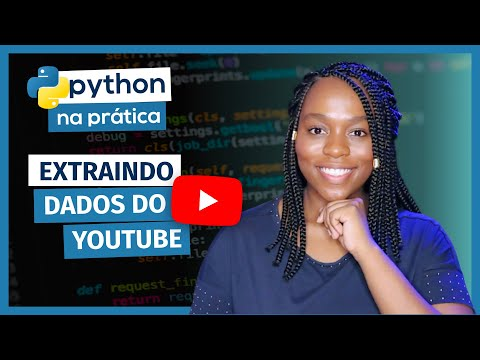

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('olDCJ1w3FLM')

In [ ]:
!pip install --upgrade google-api-python-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.4 MB 5.2 MB/s 
  Attempting uninstall: google-auth-httplib2
    Found existing installation: google-auth-httplib2 0.0.4
    Uninstalling google-auth-httplib2-0.0.4:
      Successfully uninstalled google-auth-httplib2-0.0.4
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 1.12.11
    Uninstalling google-api-python-client-1.12.11:
      Successfully uninstalled google-api-python-client-1.12.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
earthengine-api 0.1.326 requires google-api-python-client<2,>=1.12.1, but you have google-api-python-client 2.64.0 which is incompatible.


In [ ]:
!pip install python-dotenv # Biblioteca para acessar minha chave de api, definida como variáveis de ambiente num arquivo .env

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from googleapiclient.discovery import build
from datetime import datetime, timedelta, timezone, date 
from dotenv import load_dotenv # bibilioteca para ler minha api_key salva como uma variável de ambiente.

import pandas as pd
import os

In [ ]:
# Carregando variáveis de ambiente
load_dotenv('/content/drive/MyDrive/Colab Notebooks/youTube/credentials.env') 

True

In [ ]:
API_KEY = os.environ['api_key']

In [ ]:
youtube = build('youtube','v3', developerKey=API_KEY)

In [ ]:
# Extraindo videos de uma Playlist 
query = input()
nextPage_token = None

Paróquia


In [ ]:
channels = []

while True:
  search_response = youtube.search().list(
    q=query, 
    part='snippet', 
    type='channel',
    maxResults = 50,
    pageToken = nextPage_token
    ).execute()

  for search_result in search_response.get('items'):
      channels.append(search_result)
      
  nextPage_token = search_response.get('nextPageToken')
  if nextPage_token is None:
    break

In [ ]:
channels_ids = list(map(lambda x : x['snippet']['channelId'], channels))
channels_stats = []

for id in channels_ids:
  res = youtube.channels().list(part='statistics', id=id).execute()
  channels_stats.append(res['items'][0])

In [ ]:
# Dados de channels
channels_titles = list(map(lambda x: x['snippet']['title'], channels))
published_date = list(map(lambda x: str(x['snippet']['publishedAt']), channels)) #conversion from ISO8601 date format
channels_descriptions = list(map(lambda x: x['snippet']['description'], channels))

In [ ]:
# Dados de channels_stats
views = list(map(lambda x: x['statistics']['viewCount'], channels_stats))
subscribers = list(map(lambda x: int(x['statistics']['subscriberCount']), channels_stats))
videos = list(map(lambda x: int(x['statistics']['videoCount']), channels_stats))

In [ ]:
diff = timedelta(hours = -3)

t_zone = timezone(diff)
now = datetime.now(tz = t_zone)

extraction_date = [str(now)]*len(channels)
extraction_day = now.strftime('%Y-%m-%d')

In [ ]:
channels_df = pd.DataFrame({
    'id' : channels_ids,
    'title' : channels_titles,
    'publishedAt' : published_date,
    'description' : channels_descriptions,
    'views' : views,
    'subscribers' :subscribers,
    'videos' : videos
    })

file_name = input('Insira aqui o nome do arquivo: ') + f'_{extraction_day}'
channels_df.to_csv(f'/content/drive/MyDrive/Datasets/{file_name}.csv', index=False)

Insira aqui o nome do arquivo: paroquias
